In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Data_Mining_Prj/phase_2

/content/drive/MyDrive/Colab Notebooks/Data_Mining_Prj/phase_2


In [ ]:
df = pd.read_csv("./GooglePlay.csv")
df2 = pd.read_csv("./Playstore_final.csv")

<ipython-input-90-195ab7a95942>:2: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("./Playstore_final.csv")


In [ ]:
# Part 1
df = df.drop(columns="Unnamed: 0")
df = df.drop(df.index[10472])

for col in ["Reviews", "Size", "Installs", "Price"]:
    df[col] = df[col].str.extract("(\d+)")
    df[col] = df[col].dropna().astype("int")

# Part 2
unnamed_cols = [col for col in df2.columns if "Unnamed" in col]
df2 = df2.drop(unnamed_cols, axis=1)

# Part 4
# preprocess
for col in ["Installs", "Size"]:
    df2[col] = df2[col].str.extract("(\d+)")
    df2[col] = df2[col].dropna().astype("int")

df2.rename(columns={"Last update": "Last Updated"}, inplace=True)
df2["Last Updated"] = pd.to_datetime(
    df2["Last Updated"], format="%d-%b-%y", errors="coerce"
)
df["Last Updated"] = pd.to_datetime(
    df["Last Updated"], format="%d-%b-%y", errors="coerce"
)

df2.rename(columns={"Free": "Type"}, inplace=True)
df2["Type"].replace({True: "Free", False: "Paid"}, inplace=True)

# merge
# run the whole thing

In [ ]:
# Part 3
# 1
missing = df_merged.isnull().mean() * 100
df_merged.drop(
    columns=["Size", "Developer Website", "Ad Supported", "Developer Address"]
)
missing_col_num = [
    "Rating",
    "Reviews",
    "Rating Count",
]
missing_col_str = [
    "Current Ver",
    "Minimum Android",
    "Released",
    "Privacy Policy",
    "Summary",
    "Android version Text",
    "Version",
]
for c in missing_col_num:
    col_avg = df_merged[c].mean()
    df_merged[c].fillna(col_avg, inplace=True)

for c in missing_col_str:
    col_avg = df_merged[c].mode()[0]
    df_merged[c].fillna(col_avg, inplace=True)

# 2
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
scalar = MinMaxScaler()
for c in numeric_cols:
    df_merged[c] = scalar.fit_transform(df_merged[[c]])

# 4
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
result = {}
for column_data in numeric_cols:
    q1 = df_merged[column_data].quantile(0.25)
    q3 = df_merged[column_data].quantile(0.75)
    iqr = q3 - q1
    outliers = df_merged[(df_merged[column_data] < q1 - 1.5*iqr) | (df_merged[column_data] > q3 + 1.5*iqr)][column_data].tolist()
df_merged = df_merged.drop(outliers)

# 6
df_merged['Size'].fillna(df_merged['Size'].mean(), inplace=True)
df_merged['Rating'].fillna(df_merged['Rating'].mean(), inplace=True)
df_merged['Reviews'].fillna(df_merged['Reviews'].mean(), inplace=True)
df_merged['Installs'].fillna(df_merged['Installs'].mean(), inplace=True)
df_merged['Price'].fillna(df_merged['Price'].mean(), inplace=True)
df_merged['Rating Count'].fillna(df_merged['Rating Count'].mean(), inplace=True)
df_merged['Minimum Installs'].fillna(df_merged['Minimum Installs'].mean(), inplace=True)
df_merged['Rating'] = pd.qcut(df_merged['Rating'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_merged['Reviews'] = pd.qcut(df_merged['Reviews'], q=5, labels=['Very Few', 'Few', 'Medium', 'Many', 'Very Many'])
df_merged['Size'] = pd.qcut(df_merged['Size'], q=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
df_merged['Installs'] = pd.qcut(df_merged['Installs'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_merged['Rating Count'] = pd.qcut(df_merged['Rating Count'], q=5, labels=['Very Few', 'Few', 'Medium', 'Many', 'Very Many'])
df_merged['Minimum Installs'] = pd.qcut(df_merged['Minimum Installs'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_merged['Price'] = pd.cut(df_merged['Price'], bins=[-np.inf, 0.33, 0.66, np.inf], labels=['free', 'cheap', 'expensive'], duplicates="drop")

In [ ]:
df_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Privacy Policy,Ad Supported,In app purchases,Editor Choice,Summary,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,Very Low,Very Few,Small,High,Free,0.0,Everyone,Art & Design,...,https://devanzu.blogspot.com/p/privacy-policy....,True,False,False,Prank your Parents or Friends with Smoke Effec...,4.0.3 and up,Anzu Dev,NaN,0.523855,1.1
1,Infinite Painter,ART_AND_DESIGN,Low,Medium,Very Large,Low,Free,0.0,Everyone,Art & Design,...,http://www.infinitestudio.art/painter/privacy_...,NaN,True,False,"Painting, drawing, & sketching",7.0 and up,Infinite Studio LLC,1155 SEMINOLE TRAIL\nPO BOX 6402\nCHARLOTTESVI...,0.769707,6.6.1
2,Garden Coloring Book,ART_AND_DESIGN,High,Few,Very Large,Very Low,Free,0.0,Everyone,Art & Design,...,http://www.eyewind.org/en/colorfit_privacy.html,True,True,False,A magical mind journey in Colorfit Garden Colo...,4.1 and up,Colorfit,Flat 11 1/F Block 10 Shek Lei (2) Estate ...,0.522512,3.2.1
3,Tattoo Name On My Photo Editor,ART_AND_DESIGN,Low,Medium,Medium,Low,Free,0.0,Teen,Art & Design,...,http://voodamdeepolicy.000webhostapp.com/,True,False,False,This is the perfect tattoo maker app with thou...,4.4 and up,Voodamdee,NaN,0.926442,1.5
4,Tattoo Name On My Photo Editor,ART_AND_DESIGN,Low,Medium,Medium,Low,Free,0.0,Teen,Art & Design,...,https://sites.google.com/view/idroid-solution-...,True,False,False,Tattoo my photo with my name is tattoo design ...,4.2 and up,iDroid Solution,"Surat, Gujarat, India",0.168076,4.3


# PHASE ONE

## Part 1 - Knowing the dataset

In [ ]:
df = pd.read_csv('./GooglePlay.csv')

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10841.0,5420.000000,3129.671468,0.0,2710.0,5420.0,8130.0,10840.0
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

### Preprocessing

Remove the unnamed colunm and the wrong row.
Change columns `Reviews`, `Size`, `Installs` and `Price` to integers.

In [ ]:
df = df.drop(columns='Unnamed: 0')
df = df.drop(df.index[10472])

for col in ['Reviews', 'Size', 'Installs', 'Price']:
  # extract numbers
  df[col] = df[col].str.extract('(\d+)')

  # cast as int
  df[col] = df[col].dropna().astype('int')

### Analyze Dataset

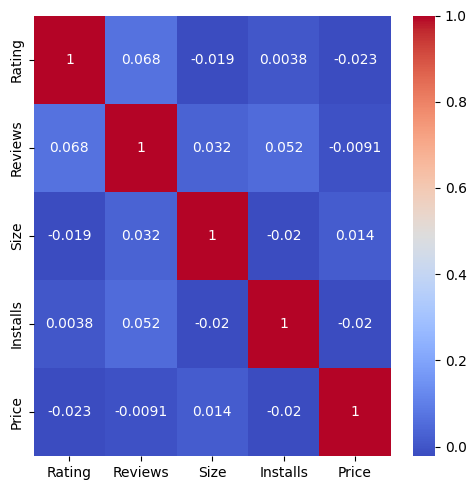

In [ ]:
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [ ]:
def analyze_dataset(dataset : pd.DataFrame , Nominal , Ordinal , Numeric):
    results = []

    for column_name, column_data in dataset.items():
        # Initialize variables
        range_val = None
        min_val = None
        max_val = None
        mean_val = None
        mode = None
        median_val = None
        outliers = None

        inconsistencies = None  # Percentage of data out of range

        # Basic information
        data_type = column_data.dtype.name
        unique_values = column_data.unique()
        unique_count = len(unique_values)


        # Basic information
        data_type = column_data.dtype.name
        unique_values = column_data.unique()
        unique_count = len(unique_values)

        if column_name in Nominal:
            data_type = "Nominal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif column_name in Ordinal:
            data_type = "Ordinal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif column_name == "Type":
            data_type  = "Binary"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif (Numeric != None and column_name in Numeric) or (Numeric is None):
            # Numeric column
            data_type = "Numeric"
            min_val = column_data.min()
            max_val = column_data.max()
            range_val = max_val - min_val
            mean_val = column_data.mean()
            mode = column_data.mode()[0]
            median_val = column_data.median()

            # Outliers
            data_std = column_data.std()
            q1 = column_data.quantile(0.25)
            q3 = column_data.quantile(0.75)
            iqr = q3 - q1
            outliers = column_data[(column_data < q1 - 1.5*iqr) | (column_data > q3 + 1.5*iqr)].tolist()
            total_data_points = len(column_data)
            out_of_range_data_points = len(outliers)
            inconsistencies = (out_of_range_data_points / total_data_points) * 100


        # Save results for this column
        results.append({
            "Name": column_name,
            "Type": data_type,
            "Range": range_val,
            "Min": min_val,
            "Max": max_val,
            "Mean": mean_val,
            "Mode": mode,
            "Median": median_val,
            "Outlier": outliers,
            "inconsistencies":inconsistencies

        })

    # Create a new DataFrame with the results
    df_results = pd.DataFrame(results)

    return df_results

In [ ]:
Nominal = ['App', 'Category', 'Genres']
Ordinal = ['Content Rating', 'Last Updated', 'Current Ver', 'Android Ver']
analyze_dataset(df , Nominal , Ordinal , None)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier,inconsistencies
0,App,Nominal,NaN,NaN,NaN,NaN,ROBLOX,NaN,None,NaN
1,Category,Nominal,NaN,NaN,NaN,NaN,FAMILY,NaN,None,NaN
2,Rating,Numeric,4.00,1.00,5.00,4.19,4.40,4.30,"[3.2, 3.2, 3.1, 3.2, 3.2, 2.6, 3.1, 3.0, 1.9, ...",4.64
3,Reviews,Numeric,78158306.00,0.00,78158306.00,444152.90,0,2094.00,"[215644, 194216, 224399, 295221, 174531, 27192...",17.75
4,Size,Numeric,1019.00,1.00,1020.00,36.86,3.00,15.00,"[201.0, 79.0, 118.0, 695.0, 84.0, 97.0, 556.0,...",6.01
5,Installs,Numeric,500.00,0.00,500.00,72.41,10,10.00,"[500, 500, 500, 500, 500, 500, 500, 500, 500, ...",8.68
6,Type,Binary,NaN,NaN,NaN,NaN,Free,NaN,None,NaN
7,Price,Numeric,400.00,0.00,400.00,0.96,0,0.00,"[4, 4, 4, 4, 3, 3, 6, 1, 2, 3, 7, 3, 3, 5, 3, ...",6.01
8,Content Rating,Ordinal,NaN,NaN,NaN,NaN,Everyone,NaN,None,NaN
9,Genres,Nominal,NaN,NaN,NaN,NaN,Tools,NaN,None,NaN


### Box Plot

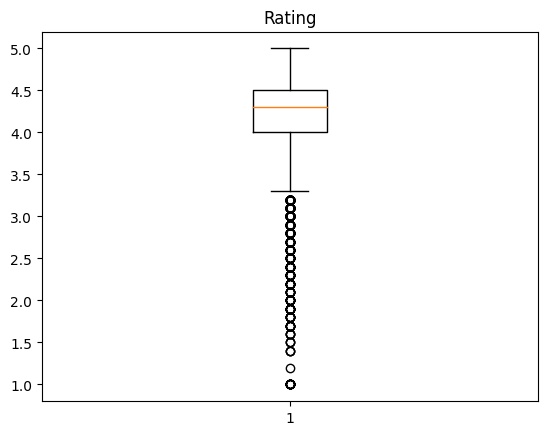

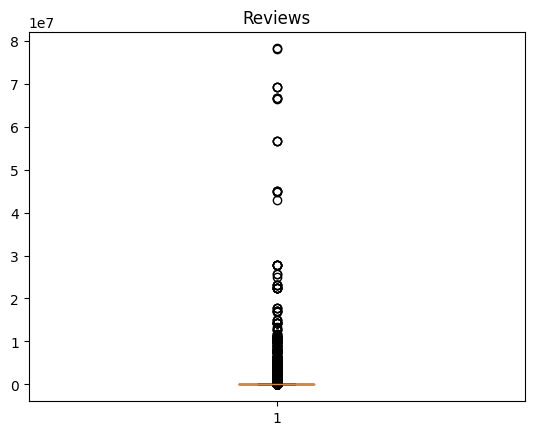

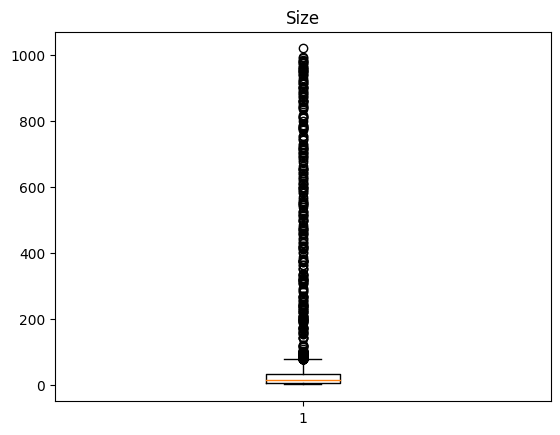

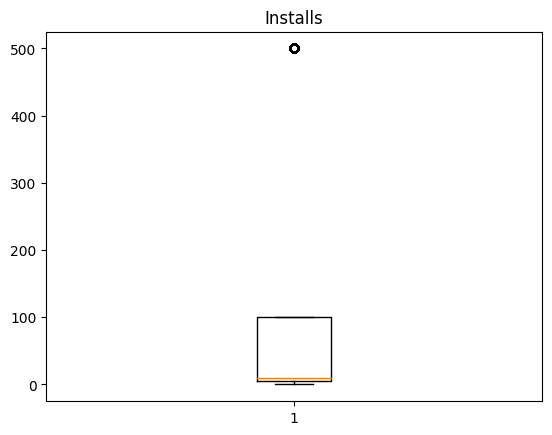

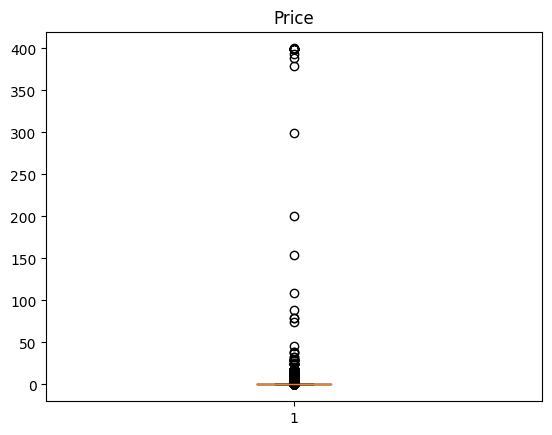

In [ ]:
numeric = df.select_dtypes(include=['number']).columns
for feature in numeric:
    plt.boxplot(df[feature].dropna())
    plt.title(feature)
    plt.show()

## Part 2 - Data Evaluation

In [ ]:
df2 = pd.read_csv("./Playstore_final.csv")

C:\Users\Elham\AppData\Local\Temp\ipykernel_16960\3040700137.py:1: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("./Playstore_final.csv")


### Preprocessing

Remove the unnamed columns.

In [ ]:
unnamed_cols = [col for col in df2.columns if 'Unnamed' in col]
df2 = df2.drop(unnamed_cols, axis=1)

In [ ]:
df2.describe()

,Rating,Rating Count,Minimum Installs,Price,Reviews,Developer Internal ID
count,447982.00,332026.00,450781.00,450702.00,447982.00,450781.00
mean,3.02,19429.24,883639.07,0.32,5118.34,6932303135092206592.00
std,1.86,664291.65,36076301.76,4.11,199311.54,1342446038561089024.00
min,0.00,3.00,0.00,0.00,0.00,4611690000000000000.00
25%,0.00,24.00,500.00,0.00,0.00,5771980000000000000.00
50%,3.93,123.00,5000.00,0.00,17.00,6939070000000000000.00
75%,4.39,990.00,50000.00,0.00,178.00,8109850000000000000.00
max,5.00,138620959.00,10000000000.00,400.00,52377198.00,9223350000000000000.00


In [ ]:
for col in df2.columns:
     new_df = df2[df2[col].notna()]

### Completeness

In [ ]:
total_rows = df.shape[0]
non_null_percentage = df.notnull().sum() / total_rows * 100

print("Completeness original dataset:")
print(non_null_percentage)

Completeness original dataset:
App              100.00
Category         100.00
Rating            86.40
Reviews          100.00
Size              84.36
Installs         100.00
Type              99.99
Price            100.00
Content Rating   100.00
Genres           100.00
Last Updated     100.00
Current Ver       99.93
Android Ver       99.98
dtype: float64


In [ ]:
total_rows1 = new_df.shape[0]
non_null_percentage1 = new_df.notnull().sum() / total_rows1 * 100

print("Completness googleplay dataset:")
print(non_null_percentage1)

Completness googleplay dataset:
App Name                100.00
App Id                  100.00
Category                100.00
Rating                   99.38
Rating Count             73.66
Installs                 99.98
Minimum Installs        100.00
Free                     99.98
Price                    99.98
Currency                 99.98
Size                    100.00
Minimum Android          99.76
Developer Id            100.00
Developer Website        75.66
Developer Email         100.00
Released                 99.24
Last update             100.00
Privacy Policy           88.73
Content Rating          100.00
Ad Supported             62.35
In app purchases        100.00
Editor Choice           100.00
Summary                  99.96
Reviews                  99.38
Android version Text     99.76
Developer               100.00
Developer Address        58.11
Developer Internal ID   100.00
Version                 100.00
dtype: float64


### Validity

In [ ]:
def calculate_percentage(column_values, condition):
    total_values = len(column_values)
    if callable(condition):
        valid_values = column_values.apply(condition).sum()
    else:
        valid_values = column_values.str.match(condition).sum()
    return (valid_values / total_values) * 100

In [ ]:
regex_patterns = {
    'Free': '^True$|^False$',
    'Price': r'^\d+(\.\d+)?$',
    'Size' : r'^\d+(\.\d+)?[Mk]$',
    'Installs': r'^\d+(,\d+)?\+$',
    'Rating': r'^[0-5](\.\d+)?$' ,
    'App Name': lambda x: isinstance(x, str),
    'Category': lambda x: isinstance(x, str),
    'Android version Text': r'^\d+(\.\d+)?(?: - \d+(\.\d+))?(?:W)? and up$',
    'App Id':'^com\.[a-zA-Z0-9_\.]+$',
    'Released':'^\d{1,2}-[A-Za-z]{3}-\d{2}$',
    'Privacy Policy': '^https?:\/\/.*$',
    'Developer Email': '^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$',
    'Content Rating': lambda x: isinstance(x, str) and x in ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Unrated', 'Adults only 18+'],
    'Ad Supported': '^True$|^False$',
    'In app purchases': '^True$|^False$',
    'Editor Choice': '^True$|^False$',
    'Summary': lambda x: isinstance(x, str),  # No specific pattern for summary
    'Developer': lambda x: isinstance(x, str),  # No specific pattern for developer name
    'Developer Address': '^[a-zA-Z0-9\s.,\'-]+$',
    'Developer Internal ID':lambda x: isinstance(x, (int, float)),
    'Version': r'^\d+(\.\d+)+$'
}

In [ ]:
percentages = {}
for column, pattern in regex_patterns.items():
    percentages[column] = calculate_percentage(new_df[column].astype(str), pattern)

print("validity:")
print(percentages)

validity:
{'Free': 99.98246863772438, 'Price': 99.98246863772438, 'Size': 95.14625372541448, 'Installs': 92.15393867573859, 'Rating': 99.3788571770956, 'App Name': 100.0, 'Category': 100.0, 'Android version Text': 88.89954085584117, 'App Id': 76.31490764966568, 'Released': 96.60091296233419, 'Privacy Policy': 88.70980269450381, 'Developer Email': 99.97558924240104, 'Content Rating': 100.0, 'Ad Supported': 62.35439537882167, 'In app purchases': 100.0, 'Editor Choice': 100.0, 'Summary': 100.0, 'Developer': 100.0, 'Developer Address': 81.39367672611796, 'Developer Internal ID': 0.0, 'Version': 73.37740584659836}


### Currentness

In [ ]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")
filtered_df = df[df['Last Updated'].dt.year.between(2015, 2018)]

update_counts_per_year_filtered = filtered_df['Last Updated'].dt.year.value_counts().sort_index()
update_percentages_per_year_filtered = (update_counts_per_year_filtered / filtered_df.shape[0]) * 100

print("Curretness googleplay dataset:")
print(update_percentages_per_year_filtered)


Curretness googleplay dataset:
Last Updated
2015    4.38
2016    7.67
2017   17.82
2018   70.13
Name: count, dtype: float64


C:\Users\Elham\AppData\Local\Temp\ipykernel_16960\1031202575.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")


In [ ]:
new_df["Last update"] = pd.to_datetime(new_df["Last update"], errors="coerce")
filtered_df = new_df[new_df['Last update'].dt.year.between(2015, 2018)]

update_counts_per_year_filtered = filtered_df['Last update'].dt.year.value_counts().sort_index()
update_percentages_per_year_filtered = (update_counts_per_year_filtered / filtered_df.shape[0]) * 100

print("Curretness orginal dataset:")
print(update_percentages_per_year_filtered)


C:\Users\Elham\AppData\Local\Temp\ipykernel_16960\291057619.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df["Last update"] = pd.to_datetime(new_df["Last update"], errors="coerce")


Curretness orginal dataset:
Last update
2015    9.00
2016   16.25
2017   28.14
2018   46.61
Name: count, dtype: float64


C:\Users\Elham\AppData\Local\Temp\ipykernel_16960\291057619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Last update"] = pd.to_datetime(new_df["Last update"], errors="coerce")


### Single Schema

`Size`, `Installs`, `Android version Text`,`Released`,`App Id`,`Privacy Policy`, `Version` They contain data outside the rule and are among the attributes with single schema errors

Many columns contain null values, which we see in the results below, indicating a single schema error

In [ ]:
total_values = df.shape[0] * df.shape[1]
total_values1 = df2.shape[0] * df2.shape[1]

total_null_values = df.isnull().sum().sum()
total_null_values1 = df2.isnull().sum().sum()
total_non_null_values = total_values - total_null_values
total_non_null_values1 = total_values1 - total_null_values1

accuracy = total_non_null_values / total_values
accuracy1 = total_non_null_values1 / total_values1

print(f"Total Values: {total_values}")
print(f"Total Null Values: {total_null_values}")
print(f"Total Non-Null Values: {total_non_null_values}")
print(f"Accuracy (Non-Null Percentage): {accuracy:.3f}")

print(f"Total orginal dataset Values: {total_values1}")
print(f"Total orginal dataset Null Values: {total_null_values1}")
print(f"Total Non-Null orginal dataset Values: {total_non_null_values1}")
print(f"Accuracy orginal dataset (Non-Null Percentage): {accuracy1:.3f}")


Total Values: 140920
Total Null Values: 3180
Total Non-Null Values: 137740
Accuracy (Non-Null Percentage): 0.977
Total orginal dataset Values: 13073026
Total orginal dataset Null Values: 649993
Total Non-Null orginal dataset Values: 12423033
Accuracy orginal dataset (Non-Null Percentage): 0.950


In [ ]:
free_and_zero_price_count = new_df[(new_df['Free'] == True) & (new_df['Price'] == 0)]
not_free_and_positive_price_count = new_df[(new_df['Free'] == False) & (new_df['Price'] > 0)]

total_instances = len(new_df)
matching_instances = len(free_and_zero_price_count) + len(not_free_and_positive_price_count)

percentage_matching = (matching_instances / total_instances) * 100

print(f"Percentage of data matching the conditions: {percentage_matching:.2f}%")


Percentage of data matching the conditions: 99.98%


### Single Instance

Some of the data in released are not in date format, it has a **single instant** error, and the data that is updated earlier than released has a **multi instant** error.

In [ ]:
new_df['Released'] = pd.to_datetime(new_df['Released'], errors='coerce', infer_datetime_format=True)

inconsistencies = new_df[new_df['Last update'] < new_df['Released']]
num_inconsistencies = inconsistencies.shape[0]

if num_inconsistencies>0:
    print(f"Found {num_inconsistencies} inconsistencies where 'Last update' is before 'Released'.")
else:
    print("No inconsistencies found. All 'Last update' dates are after or equal to 'Released' dates.")


C:\Users\Elham\AppData\Local\Temp\ipykernel_16960\690390030.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_df['Released'] = pd.to_datetime(new_df['Released'], errors='coerce', infer_datetime_format=True)
C:\Users\Elham\AppData\Local\Temp\ipykernel_16960\690390030.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df['Released'] = pd.to_datetime(new_df['Released'], errors='coerce', infer_datetime_format=True)


Found 828 inconsistencies where 'Last update' is before 'Released'.


C:\Users\Elham\AppData\Local\Temp\ipykernel_16960\690390030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Released'] = pd.to_datetime(new_df['Released'], errors='coerce', infer_datetime_format=True)


The output provided indicates **referential integrity violations**. This means there are rows in data where the `Developer Internal ID` is associated with multiple distinct values in the `Developer` or `Developer Email` columns.In a well-structured database, each `Developer Internal ID` should ideally reference a single `Developer` and a single `Developer Email`.

Possible causes for these violations include:
* **Data entry errors:** Duplicate entries or typos during data input can lead to inconsistencies.
* **Updates from multiple sources:** If data is updated from separate sources, one source might update `Developer` while another updates `Developer Email`, causing mismatches.


The `installs`, `size` columns have prepositions and have a misspelling error

In [ ]:

violations = new_df.groupby('Developer Internal ID').agg(
    Unique_Developer_Count=pd.NamedAgg(column='Developer', aggfunc=lambda x: x.nunique()),
    Unique_Email_Count=pd.NamedAgg(column='Developer Email', aggfunc=lambda x: x.nunique())
).query('Unique_Developer_Count > 1 or Unique_Email_Count > 1')

if violations.empty:
  print("No referential integrity violations found.")
elif violations.shape[0] == 1 and violations['Unique_Developer_Count'].iloc[0] == 1 and violations['Unique_Email_Count'].iloc[0] > 1:
  print("Found single instance referential integrity violation (multiple emails for one developer).")
elif violations.shape[0] == 1 and violations['Unique_Developer_Count'].iloc[0] > 1 and violations['Unique_Email_Count'].iloc[0] == 1:
  print("Found single instance referential integrity violation (multiple developers for one email).")
else:
  print("Found referential integrity violations (multiple developers or emails per ID).")

Found referential integrity violations (multiple developers or emails per ID).


To improve the data quality, we remove outliers, nan, null, missing data, misspelling, out of format, pattern, etc. In general, we solve single instant, single schema, multi instant problems to achieve better quality.
correct inconsistent data, fill in missing values , identify outliers and smooth out noisy data

### Multi Instance

By calculating the outlier and then calculating the percentage of the data containing the outlier, the following adjectives have a multi-instantaneous error, which is calculated in the table in the `inconsistencies`  column.
`Price` , `Installs` , `Size` , `Reviews` , `Rating`

## Part 4 - Dataset Combination

### Preprocessing df2

Change columns `Installs` and `Size` to integers.

Rename `Last update` to `Last Updated` and change the format of the dates to match the column `Last Updated` in df.

Rename `Free` to `Type` and change the values to 'Free' or 'Paid', to match the column `Type` in df.

In [ ]:
for col in ["Installs", "Size"]:
    # extract numbers
    df2[col] = df2[col].str.extract("(\d+)")

    # cast as int
    df2[col] = df2[col].dropna().astype("int")

AttributeError: Can only use .str accessor with string values!

In [ ]:
df2.rename(columns={"Last update": "Last Updated"}, inplace=True)
df2["Last Updated"] = pd.to_datetime(
    df2["Last Updated"], format="%d-%b-%y", errors="coerce"
)
df["Last Updated"] = pd.to_datetime(
    df["Last Updated"], format="%d-%b-%y", errors="coerce"
)

In [ ]:
print(df['Last Updated'])
print(df2['Last Updated'])

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]
0        2017-07-19
1        2017-05-05
2        2017-07-18
3        2017-06-24
4        2017-10-06
            ...    
450789   2020-06-26
450790   2020-09-13
450791   2021-04-22
450792   2020-07-28
450793   2020-11-09
Name: Last Updated, Length: 450794, dtype: datetime64[ns]


In [ ]:
df2.rename(columns={"Free": "Type"}, inplace=True)
df2['Type'].replace({True: 'Free', False: 'Paid'}, inplace=True)

In [ ]:
print(df["Type"])
print(df2["Type"])

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 10840, dtype: object
0         Free
1         Free
2         Free
3         Free
4         Free
          ... 
450789    Free
450790    Free
450791    Free
450792    Free
450793    Free
Name: Type, Length: 450794, dtype: object


### Merge

In [ ]:
df_merged = pd.merge(df, df2, how="inner", left_on="App", right_on="App Name")

In [ ]:
df_merged = df_merged.drop(columns="App Name")

In [ ]:
df_merged

,App,Category_x,Rating_x,Reviews_x,Size_x,Installs_x,Type_x,Price_x,Content Rating_x,Genres,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews_y,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50,Free,0,Everyone,Art & Design,...,True,False,False,Prank your Parents or Friends with Smoke Effec...,448.0,4.0.3 and up,Anzu Dev,NaN,7.028150e+18,1.1
1,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1,Free,0,Everyone,Art & Design,...,NaN,True,False,"Painting, drawing, & sketching",42184.0,7.0 and up,Infinite Studio LLC,1155 SEMINOLE TRAIL\nPO BOX 6402\nCHARLOTTESVI...,8.161090e+18,6.6.1
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1,Free,0,Everyone,Art & Design,...,True,True,False,A magical mind journey in Colorfit Garden Colo...,5589.0,4.1 and up,Colorfit,Flat 11 1/F Block 10 Shek Lei (2) Estate ...,7.021960e+18,3.2.1
3,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20.0,10,Free,0,Teen,Art & Design,...,True,False,False,This is the perfect tattoo maker app with thou...,41.0,4.4 and up,Voodamdee,NaN,8.883360e+18,1.5
4,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20.0,10,Free,0,Teen,Art & Design,...,True,False,False,Tattoo my photo with my name is tattoo design ...,20280.0,4.2 and up,iDroid Solution,"Surat, Gujarat, India",5.388640e+18,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,Poker Pro.Fr,GAME,4.2,5442,17.0,100,Free,0,Teen,Card,...,True,True,False,Texas Poker Pro offers the most comprehensive ...,1431.0,4.1 and up,Century Games Limited,"Ugland House, KY-Grand Cayman KY1-1104, Cayman...",8.152170e+18,6.0.0
6246,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.0,500,Free,0,Everyone,Books & Reference,...,True,False,False,"Multilingual Dictionary, (in Arabic Dictionary...",2384.0,4.1 and up,Golden-Soft,www.golden-soft.net,6.582520e+18,21.0.3.08
6247,HTC Sense Input - FR,TOOLS,4.0,885,8.0,100,Free,0,Everyone,Tools,...,NaN,False,False,Download this add-on to improve word predictio...,232.0,5.0 and up,HTC Corporation,"88 Section 3, Zhongxing Road, Xindian District...",5.004080e+18,1.0.612928
6248,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5,Free,0,Mature 17+,Social,...,True,True,False,"Say hi to people around the world online, chat...",31826.0,Varies with device,My Friends Social,"6, Vasili Vryonides str. Gala Court Chambers, ...",5.961610e+18,Varies with device


In [ ]:
duplicate_cols = []
for c in df_merged:
    if '_x' in c:
        result = c[:-2]
        duplicate_cols.append(result)
        print(result)

Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Last Updated


These columns exist in both datasets, so there are two copies of them in df_merged:

`Category`, `Rating`, `Reviews`, `Size`, `Installs`, `Type`, `Price`, `Content Rating`, `Last Updated`

To solve conflicts where different values are stored in these columns, you can perform actions like:
- Choose one dataset's value and discard the other
- Store both values
- Take the average, maximum or minimum of the conflicting values
- Flag the rows for further inspection

For the numeric values, we are going to replace the conflicting values with the mean of two values. For the rest, we are going to keep the value from the original dataset (df) and discard the other (df2).

In [ ]:
duplicate_numeric = [
    "Rating",
    "Reviews",
    "Size",
    "Installs",
    "Price",
]

In [ ]:
# numeric columns - replace conflicts with the mean value
for c in duplicate_numeric:
    df_merged[f"{c}_x"] = df_merged[f"{c}_x"].astype("float64")
    df_merged[f"{c}_y"] = df_merged[f"{c}_y"].astype("float64")

    mask_different = df_merged[f"{c}_x"] != df_merged[f"{c}_y"]
    avg = (df_merged[f"{c}_x"] + df_merged[f"{c}_y"]) / 2
    df_merged.loc[mask_different, f"{c}_x"] = avg

In [ ]:
# duplicate columns - drop col_y and keep the original value in col_x
for c in duplicate_cols:
    df_merged = df_merged.drop(columns=f"{c}_y")
    df_merged.rename(columns={f"{c}_x": c}, inplace=True)

In [ ]:
df_merged

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Privacy Policy,Ad Supported,In app purchases,Editor Choice,Summary,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.431532,313.0,19.0,75.0,Free,0.0,Everyone,Art & Design,...,https://devanzu.blogspot.com/p/privacy-policy....,True,False,False,Prank your Parents or Friends with Smoke Effec...,4.0.3 and up,Anzu Dev,NaN,7.028150e+18,1.1
1,Infinite Painter,ART_AND_DESIGN,4.070869,39499.5,76.5,5.5,Free,0.0,Everyone,Art & Design,...,http://www.infinitestudio.art/painter/privacy_...,NaN,True,False,"Painting, drawing, & sketching",7.0 and up,Infinite Studio LLC,1155 SEMINOLE TRAIL\nPO BOX 6402\nCHARLOTTESVI...,8.161090e+18,6.6.1
2,Garden Coloring Book,ART_AND_DESIGN,4.369976,9690.0,36.0,1.0,Free,0.0,Everyone,Art & Design,...,http://www.eyewind.org/en/colorfit_privacy.html,True,True,False,A magical mind journey in Colorfit Garden Colo...,4.1 and up,Colorfit,Flat 11 1/F Block 10 Shek Lei (2) Estate ...,7.021960e+18,3.2.1
3,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.160000,22435.0,25.0,10.0,Free,0.0,Teen,Art & Design,...,http://voodamdeepolicy.000webhostapp.com/,True,False,False,This is the perfect tattoo maker app with thou...,4.4 and up,Voodamdee,NaN,8.883360e+18,1.5
4,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.141526,32554.5,21.5,10.0,Free,0.0,Teen,Art & Design,...,https://sites.google.com/view/idroid-solution-...,True,False,False,Tattoo my photo with my name is tattoo design ...,4.2 and up,iDroid Solution,"Surat, Gujarat, India",5.388640e+18,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,Poker Pro.Fr,GAME,3.976298,3436.5,38.5,100.0,Free,0.0,Teen,Card,...,https://www.centurygame.com/privacy-policy/,True,True,False,Texas Poker Pro offers the most comprehensive ...,4.1 and up,Century Games Limited,"Ugland House, KY-Grand Cayman KY1-1104, Cayman...",8.152170e+18,6.0.0
6246,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,3.982853,4079.5,5.5,250.5,Free,0.0,Everyone,Books & Reference,...,http://www.golden-soft.net/privacy/golden_dict...,True,False,False,"Multilingual Dictionary, (in Arabic Dictionary...",4.1 and up,Golden-Soft,www.golden-soft.net,6.582520e+18,21.0.3.08
6247,HTC Sense Input - FR,TOOLS,4.186916,558.5,8.0,300.0,Free,0.0,Everyone,Tools,...,https://www.htc.com/privacy/,NaN,False,False,Download this add-on to improve word predictio...,5.0 and up,HTC Corporation,"88 Section 3, Zhongxing Road, Xindian District...",5.004080e+18,1.0.612928
6248,Frim: get new friends on local chat rooms,SOCIAL,3.930047,60156.0,NaN,5.0,Free,0.0,Mature 17+,Social,...,https://frim.chat/privacy,True,True,False,"Say hi to people around the world online, chat...",Varies with device,My Friends Social,"6, Vasili Vryonides str. Gala Court Chambers, ...",5.961610e+18,Varies with device


## Part 3 - Preprocessing

### 1. Missing Value

In [ ]:
# calculate the percentage of missing values for each column
missing = df_merged.isnull().mean() * 100
print(missing)

App                           0.000
Category                      0.000
Rating                        0.000
Reviews                       0.000
Size                          0.000
Installs                      0.000
Type                          0.000
Price                         0.000
Content Rating                0.000
Genres                        0.000
Last Updated                  0.000
Current Ver                   0.000
Android Ver                   0.000
App Id                        0.000
Rating Count                  0.000
Minimum Installs              0.000
Currency                      0.000
Minimum Android               0.000
Developer Id                  0.000
Developer Website            17.840
Developer Email               0.000
Released                      0.000
Privacy Policy                0.000
Ad Supported                 31.520
In app purchases              0.000
Editor Choice                 0.000
Summary                       0.000
Android version Text        

In [ ]:
print(missing[missing > 0])

Developer Website    17.840
Ad Supported         31.520
Developer Address    27.904
dtype: float64


The columns with more than 15% missing values are dropped.

The missing values of numeric columns are replaced with the average value of that column.

The missing values of other columns are replaced with the mode value of that column.

In [ ]:
# Drop columns with missing value percentage higher than 15
df_merged.drop(
    columns=["Size", "Developer Website", "Ad Supported", "Developer Address"]
)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Developer Internal ID,Version,Rating_category,Reviews_category,Size_category,Installs_category,Rating_count_category,Minimum_installs_category,Rating_count,Minimum_installs
0,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,Very Low,Very Few,High,Free,0.0,Everyone,Art & Design,2018-04-26,...,0.523855,1.1,Very Low,Very Few,Small,High,Few,Low,Few,Low
1,Infinite Painter,ART_AND_DESIGN,Low,Medium,Low,Free,0.0,Everyone,Art & Design,2018-06-14,...,0.769707,6.6.1,Low,Medium,Very Large,Low,Many,High,Many,High
2,Garden Coloring Book,ART_AND_DESIGN,High,Few,Very Low,Free,0.0,Everyone,Art & Design,2017-09-20,...,0.522512,3.2.1,High,Few,Very Large,Very Low,Medium,Medium,Medium,Medium
3,Tattoo Name On My Photo Editor,ART_AND_DESIGN,Low,Medium,Low,Free,0.0,Teen,Art & Design,2018-04-02,...,0.926442,1.5,Low,Medium,Medium,Low,Very Few,Very Low,Very Few,Very Low
4,Tattoo Name On My Photo Editor,ART_AND_DESIGN,Low,Medium,Low,Free,0.0,Teen,Art & Design,2018-04-02,...,0.168076,4.3,Low,Medium,Medium,Low,Many,High,Many,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,Poker Pro.Fr,GAME,Low,Few,High,Free,0.0,Teen,Card,2018-05-22,...,0.767772,6.0.0,Low,Few,Very Large,High,Medium,Low,Medium,Low
6246,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,Low,Few,Very High,Free,0.0,Everyone,Books & Reference,2018-07-19,...,0.427152,21.0.3.08,Low,Few,Very Small,Very High,Medium,Medium,Medium,Medium
6247,HTC Sense Input - FR,TOOLS,Medium,Very Few,Very High,Free,0.0,Everyone,Tools,2015-10-30,...,0.084625,1.0.612928,Medium,Very Few,Small,Very High,Few,Medium,Few,Medium
6248,Frim: get new friends on local chat rooms,SOCIAL,Low,Many,Very Low,Free,0.0,Mature 17+,Social,2018-03-23,...,0.292412,Varies with device,Low,Many,Medium,Very Low,Many,High,Many,High


In [ ]:
missing_col_num = [
    "Rating",
    "Reviews",
    "Rating Count",
]
missing_col_str = [
    "Current Ver",
    "Minimum Android",
    "Released",
    "Privacy Policy",
    "Summary",
    "Android version Text",
    "Version",
]

In [ ]:
for c in missing_col_num:
    col_avg = df_merged[c].mean()
    df_merged[c].fillna(col_avg, inplace=True)

for c in missing_col_str:
    col_avg = df_merged[c].mode()[0]
    df_merged[c].fillna(col_avg, inplace=True)

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

### 2. Data Conversion

The numeric columns are normalized to range (0,1). The results are saved in a new column called `col_normalized`.

numeric columns : `Rating`, `Reviews`, `Size`, `Installs`, `Price`, `Rating Count`, `Minimum Install`, `Developer Internal ID`

In [ ]:
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Rating Count',
       'Minimum Installs', 'Developer Internal ID'],
      dtype='object')


In [ ]:
scalar = MinMaxScaler()

for c in numeric_cols:
    name = c + "_normalized"
    df_merged[name] = scalar.fit_transform(df_merged[[c]])

### 3. Feature Generation

In [ ]:
df_merged['popularity'] = (df_merged['Rating'] > 4) & (df_merged['Type'] == 'free') & (df_merged['Editor Choice'] == 'true')
df_merged['popularity'] = df_merged['popularity'].astype(int)
print(df_merged['popularity'])

0       0
1       0
2       0
3       0
4       0
       ..
6245    0
6246    0
6247    0
6248    0
6249    0
Name: popularity, Length: 6250, dtype: int64


### 4. Outlier

In [ ]:
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
result = {}

for column_data in numeric_cols:
    q1 = df_merged[column_data].quantile(0.25)
    q3 = df_merged[column_data].quantile(0.75)
    iqr = q3 - q1
    outliers = df_merged[(df_merged[column_data] < q1 - 1.5*iqr) | (df_merged[column_data] > q3 + 1.5*iqr)][column_data].tolist()
    result[column_data] = ", ".join(map(str, outliers))

result_df = pd.DataFrame(result, index=[0])

result_df

,Rating,Reviews,Size,Installs,Price,Rating Count,Minimum Installs,Developer Internal ID,popularity
0,"2.3, 2.3, 2.3, 3.12352935, 2.0, 2.1, 2.1, 2.1,...","541082.0, 343621.5, 567791.5, 567827.0, 549348...","81.0, 81.0, 81.0, 81.0, 118.0, 326.0, 487.5, 8...","300.0, 300.0, 300.0, 250.5, 275.0, 500.0, 500....","0.745, 0.745, 4.495, 4.495, 4.995, 4.995, 4.99...","1179461.144622346, 1179461.144622346, 1179461....","100000000.0, 50000000.0, 100000000.0, 10000000...",,


In [ ]:
df_merged = df_merged.drop(outliers)

### 5. Data Reduction

In [ ]:
numeric_columns = [
    'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Rating Count',
    'Minimum Installs', 'Rating_normalized', 'Reviews_normalized',
    'Size_normalized', 'Installs_normalized', 'Price_normalized',
    'Rating Count_normalized', 'Minimum Installs_normalized',
    'Developer Internal ID_normalized'
]

numeric_data = df_merged[numeric_columns]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

imputer = SimpleImputer(strategy='mean')
normalized_data_imputed = imputer.fit_transform(normalized_data)

pca = PCA(n_components=5)
principal_components = pca.fit_transform(normalized_data_imputed)

pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(data=principal_components, columns=pca_columns)

In [ ]:
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5
0 -0.411253 -0.986722  0.838593 -0.495269 -0.193608
1 -0.392517  0.544230 -0.121655 -0.662751  0.739648
2 -0.381031  0.848424 -0.539801 -0.464810 -0.016472
3 -0.468418  0.549634 -0.262734 -0.540721 -0.338320
4 -0.304798  0.411441 -0.162919 -0.590406 -0.150867


In [ ]:
df_reduced = pd.concat([df_merged.drop(columns=numeric_columns), df_pca], axis=1)

print(df_reduced.head())

                                       App        Category  Type  \
0  Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN  Free   
1                         Infinite Painter  ART_AND_DESIGN  Free   
2                     Garden Coloring Book  ART_AND_DESIGN  Free   
3           Tattoo Name On My Photo Editor  ART_AND_DESIGN  Free   
4           Tattoo Name On My Photo Editor  ART_AND_DESIGN  Free   

  Content Rating        Genres Last Updated Current Ver   Android Ver  \
0       Everyone  Art & Design   2018-04-26         1.1  4.0.3 and up   
1       Everyone  Art & Design   2018-06-14    6.1.61.1    4.2 and up   
2       Everyone  Art & Design   2017-09-20       2.9.2    3.0 and up   
3           Teen  Art & Design   2018-04-02         3.8    4.1 and up   
4           Teen  Art & Design   2018-04-02         3.8    4.1 and up   

                                              App Id Currency  ...  \
0      com.devanzu.smokeeffectphotomaker.smokeeditor      USD  ...   
1           

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer


# df_merged.drop(columns=['Privacy Policy', 'Ad Supported', 'In app purchases', 'Editor Choice', 'Summary', 'Android version Text', 'Developer Address', 'Developer Website'], inplace=True, errors='ignore')

# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# column_transformer = ColumnTransformer(
#     [("encoder", OneHotEncoder(sparse_output=False), categorical_cols)],
#     remainder='passthrough'
# )

# X = df_merged.drop('popularity', axis=1)
# y = df_merged['popularity']

# X_encoded = column_transformer.fit_transform(X)
# X_encoded_df = pd.DataFrame(X_encoded, columns=column_transformer.get_feature_names_out())  # get_feature_names_out for new scikit-learn versions

# X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
print(df_merged.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'App Id', 'Rating Count', 'Minimum Installs', 'Currency',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Privacy Policy', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'Summary', 'Android version Text',
       'Developer', 'Developer Address', 'Developer Internal ID', 'Version',
       'Rating_normalized', 'Reviews_normalized', 'Size_normalized',
       'Installs_normalized', 'Price_normalized', 'Rating Count_normalized',
       'Minimum Installs_normalized', 'Developer Internal ID_normalized',
       'popularity'],
      dtype='object')


### 6. Numeric to Categorical

In [ ]:
print(df_merged.select_dtypes(include=['float64', 'int64']))

In [ ]:
df_merged['Size'].fillna(df_merged['Size'].mean(), inplace=True)
df_merged['Rating'].fillna(df_merged['Rating'].mean(), inplace=True)
df_merged['Reviews'].fillna(df_merged['Reviews'].mean(), inplace=True)
df_merged['Installs'].fillna(df_merged['Installs'].mean(), inplace=True)
df_merged['Price'].fillna(df_merged['Price'].mean(), inplace=True)
df_merged['Rating Count'].fillna(df_merged['Rating Count'].mean(), inplace=True)
df_merged['Minimum Installs'].fillna(df_merged['Minimum Installs'].mean(), inplace=True)

In [ ]:
df_merged['Rating_category'] = pd.qcut(df_merged['Rating'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_merged['Reviews_category'] = pd.qcut(df_merged['Reviews'], q=5, labels=['Very Few', 'Few', 'Medium', 'Many', 'Very Many'])
df_merged['Size_category'] = pd.qcut(df_merged['Size'], q=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
df_merged['Installs_category'] = pd.qcut(df_merged['Installs'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_merged['Price_category'] = pd.qcut(df_merged['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_merged['Rating_count_category'] = pd.qcut(df_merged['Rating Count'], q=5, labels=['Very Few', 'Few', 'Medium', 'Many', 'Very Many'])
df_merged['Minimum_installs_category'] = pd.qcut(df_merged['Minimum Installs'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_merged['Price_categpry'] = pd.cut(df_merged['Price'], bins=[-np.inf, 0.33, 0.66, np.inf], labels=['free', 'cheap', 'expensive'], duplicates="drop")

In [ ]:
print(df_merged[['Rating', 'Rating_category', 'Reviews', 'Reviews_category', 'Size', 'Size_category', 'Installs', 'Installs_category', 'Price', 'Rating Count', 'Rating_count_category', 'Minimum Installs', 'Minimum_installs_category']].head())

     Rating Rating_category  Reviews Reviews_category  Size Size_category  \
0  3.431532        Very Low    313.0         Very Few  19.0         Small   
1  4.070869             Low  39499.5           Medium  76.5    Very Large   
2  4.369976            High   9690.0              Few  36.0    Very Large   
3  4.160000             Low  22435.0           Medium  25.0        Medium   
4  4.141526             Low  32554.5           Medium  21.5        Medium   

   Installs Installs_category  Price  Rating Count Rating_count_category  \
0      75.0              High    0.0        1114.0                   Few   
1       5.5               Low    0.0       92790.0                  Many   
2       1.0          Very Low    0.0       16599.0                Medium   
3      10.0               Low    0.0         110.0              Very Few   
4      10.0               Low    0.0       50147.0                  Many   

   Minimum Installs Minimum_installs_category  
0          100000.0             

In [ ]:
category_columns = [
    'Rating_category', 'Reviews_category', 'Size_category', 'Installs_category',
     'Rating_count_category', 'Minimum_installs_category'
]
category_counts = {}
for column in category_columns:
    category_counts[column] = df_merged[column].value_counts()

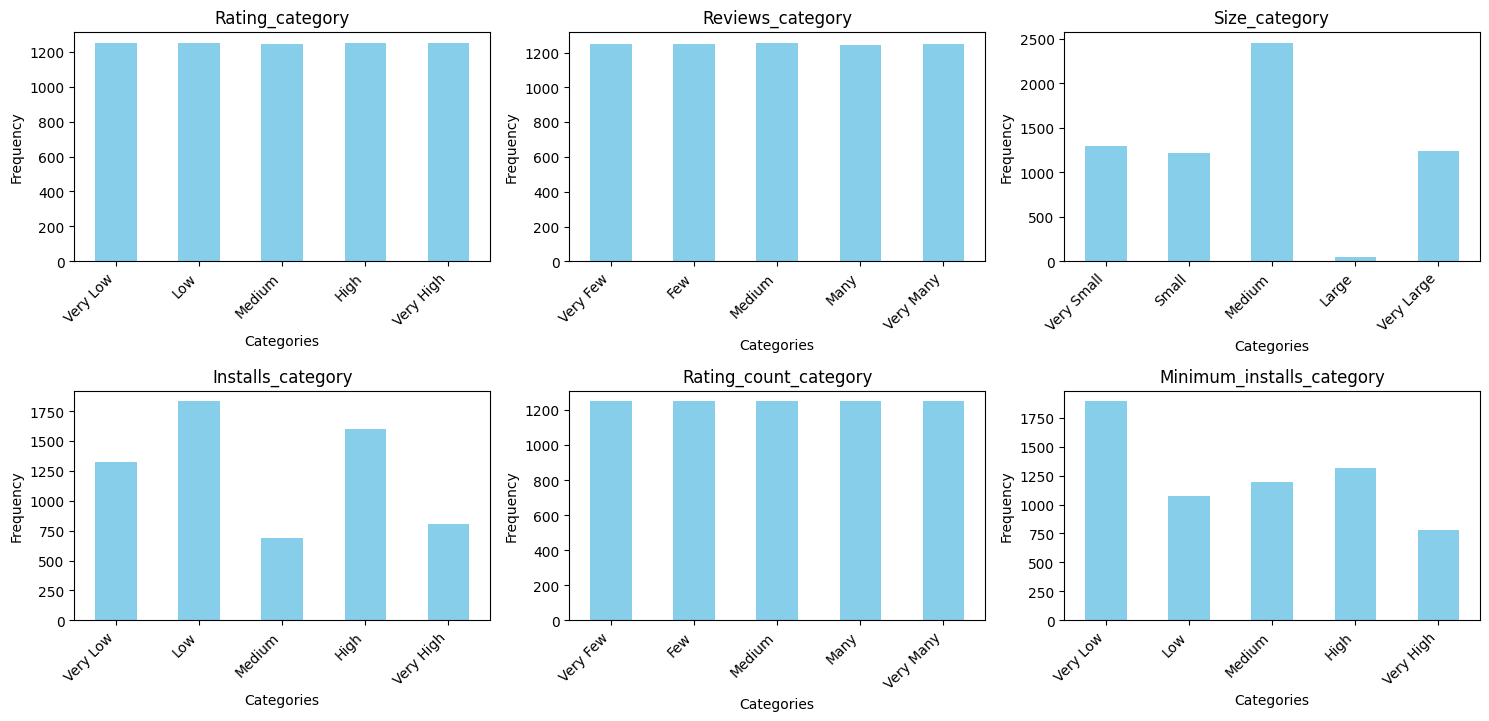

In [ ]:
plt.figure(figsize=(15, 10))
for i, (column, counts) in enumerate(category_counts.items(), start=1):
    plt.subplot(3, 3, i)
    counts.sort_index().plot(kind='bar', color='skyblue')
    plt.title(column)
    plt.ylabel('Frequency')
    plt.xlabel('Categories')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 7. Text Data

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
text_columns = df_merged.select_dtypes(include=['object']).columns


def lemmatize_text(text):
    if not isinstance(text, str):
        return text
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    if not isinstance(text, str):
        return text
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

for column in text_columns:
    df_merged[column] = df_merged[column].astype(str).apply(remove_stopwords)
    df_merged[column] = df_merged[column].apply(lemmatize_text)
    df_merged[column] = df_merged[column].apply(stem_text)

In [ ]:
text = ' '.join(df_merged.select_dtypes(include=['object']).dropna())  # ادغام همه متن‌ها در یک رشته بزرگ

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(text)

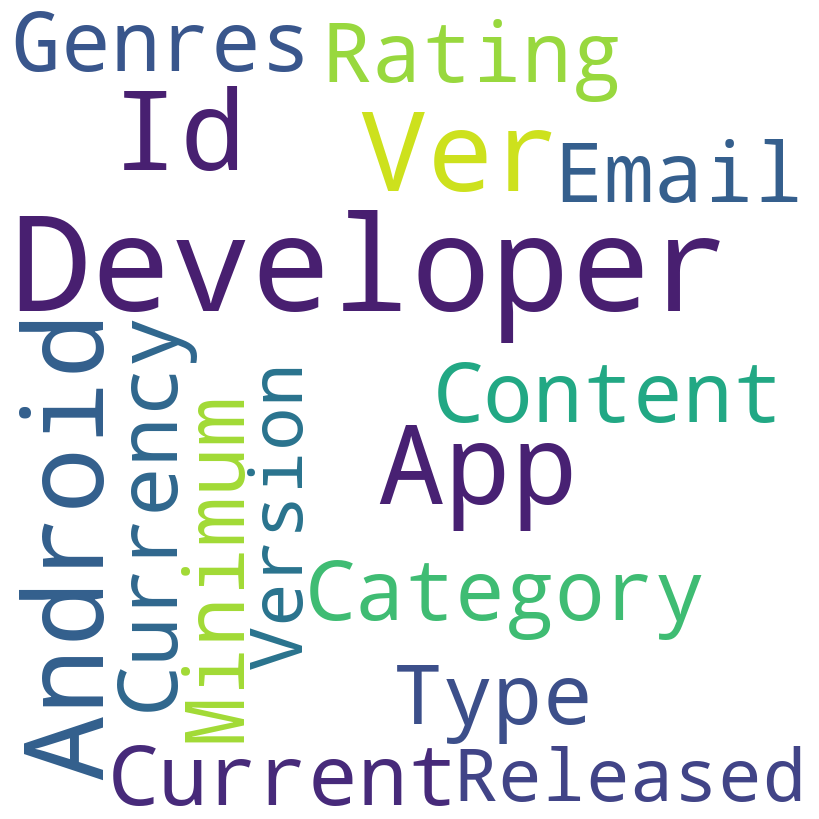

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### 8. Rating Comparisson

In [ ]:
from scipy import stats

total_mean_rating = df_merged['Rating'].mean()
sports_apps_rating = df_merged[df_merged['Genres'] == 'Sports']['Rating']
t_statistic, p_value = stats.ttest_1samp(sports_apps_rating, total_mean_rating)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

print(df_merged[df_merged['Category'] == 'SPORTS'])

t-statistic: nan
p-value: nan


c:\Users\Elham\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Elham\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### 9. Multi instance
![image.png](attachment:image.png)

App Name, Free, Last update have a multi instance

# PHASE TWO

## Preprocessing

In [ ]:
df_merged.to_csv('./clean.csv')
df = df_merged

Drop unneccesary columns.

In [ ]:
for col in df:
  if not (df[col].dtype=='category'):
    print(col)

df = df.drop(columns=['Privacy Policy', 'Summary', 'Developer Internal ID', 'Price', 'Last Updated',
                      'Current Ver', 'App Id', 'Currency', 'Developer Id',
                      'Developer Website', 'Developer Email', 'Developer Address'])
df = df.drop(columns=['App', 'Category', 'Type', 'Content Rating', 'Genres',
                      'Android Ver', 'Minimum Android', 'Released', 'Ad Supported',
                      'In app purchases', 'Editor Choice', 'Android version Text',
                      'Developer', 'Version'])

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rating,Reviews,Size,Installs,Rating Count,Minimum Installs
0,Very Low,Very Few,Small,High,Few,Low
1,Low,Medium,Very Large,Low,Many,High
2,High,Few,Very Large,Very Low,Medium,Medium
3,Low,Medium,Medium,Low,Very Few,Very Low
4,Low,Medium,Medium,Low,Many,High


## K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_encoded = pd.get_dummies(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

     support                                           itemsets
0    0.20000                                  (Rating_Very Low)
1    0.20048                                       (Rating_Low)
2    0.19952                                    (Rating_Medium)
3    0.20000                                      (Rating_High)
4    0.20000                                 (Rating_Very High)
..       ...                                                ...
156  0.09312  (Installs_High, Minimum Installs_Low, Rating C...
157  0.05040  (Installs_High, Minimum Installs_Very High, Ra...
158  0.05552  (Minimum Installs_High, Rating Count_Many, Rev...
159  0.05840  (Minimum Installs_Very High, Size_Medium, Revi...
160  0.05008  (Minimum Installs_Very High, Installs_High, Re...

[161 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules)

                                          antecedents  \
0                        (Minimum Installs_Very High)   
1                              (Minimum Installs_Low)   
2                             (Rating Count_Very Few)   
3                              (Minimum Installs_Low)   
4                           (Minimum Installs_Medium)   
5                             (Minimum Installs_High)   
6                                 (Rating Count_Many)   
7                        (Minimum Installs_Very High)   
8   (Minimum Installs_Very Low, Rating Count_Very ...   
9           (Rating_Very Low, Rating Count_Very Many)   
10                   (Installs_Low, Reviews_Very Few)   
11          (Reviews_Very Few, Rating Count_Very Few)   
12           (Minimum Installs_Low, Reviews_Very Few)   
13                   (Reviews_Few, Installs_Very Low)   
14             (Minimum Installs_Medium, Reviews_Few)   
15            (Minimum Installs_High, Reviews_Medium)   
16              (Minimum Instal

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_encoded)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_encoded)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


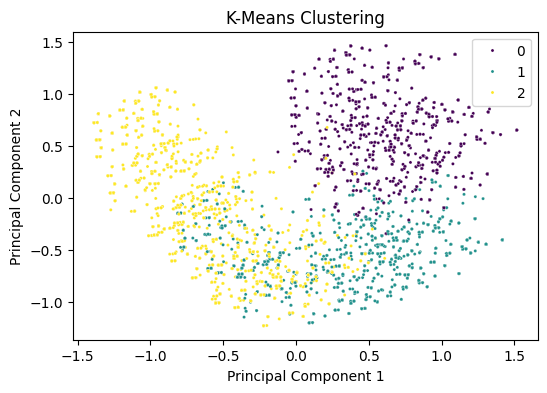

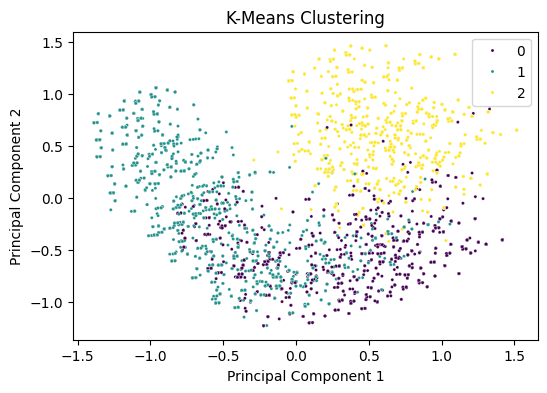

In [ ]:
pca = PCA(n_components=2)

visualize = pca.fit_transform(df_encoded)

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=visualize[:, 0], y=visualize[:, 1], hue=kmeans_labels, palette='viridis', s=5)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

pca = PCA(n_components=2)

visualize = pca.fit_transform(df_encoded)

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=visualize[:, 0], y=visualize[:, 1], hue=hierarchical_labels, palette='viridis', s=5)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
df_numbers = df_encoded.select_dtypes(include=['number'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rating_Very Low,Rating_Low,Rating_Medium,Rating_High,Rating_Very High,Reviews_Very Few,Reviews_Few,Reviews_Medium,Reviews_Many,Reviews_Very Many,...,Rating Count_Very Few,Rating Count_Few,Rating Count_Medium,Rating Count_Many,Rating Count_Very Many,Minimum Installs_Very Low,Minimum Installs_Low,Minimum Installs_Medium,Minimum Installs_High,Minimum Installs_Very High
0,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,False,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
6246,False,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
6247,False,False,True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
6248,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
numeric_vals = df_numbers
numeric_corr = numeric_vals.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
numeric_corr.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, 0)

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 500x500 with 0 Axes>